In [1]:
# [Plotting in Python — Geo-Python site documentation](https://geo-python.github.io/site/lessons/L7/python-plotting.html)
# https://geo-python.github.io/site/lessons/L7/python-plotting.html

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_bokeh

plt.rcParams['figure.figsize'] = [12,6]

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

In [74]:
print(pd.__version__)
print(matplotlib.__version__)

1.0.3


NameError: name 'matplotlib' is not defined

In [4]:
fp = r"data/029740.txt"

data = pd.read_csv(fp, delim_whitespace=True,
                  na_values=['*','**','***','****','*****','******'],
                  usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                  parse_dates=['YR--MODAHRMN'], index_col='YR--MODAHRMN')

In [5]:
data.head()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
1952-01-01 00:00:00,36.0,NaN,NaN
1952-01-01 06:00:00,37.0,NaN,34.0
1952-01-01 12:00:00,39.0,NaN,NaN
1952-01-01 18:00:00,36.0,39.0,NaN
1952-01-02 00:00:00,36.0,NaN,NaN


In [8]:
len(data)

931767

In [9]:
data1 = pd.read_csv(fp, delim_whitespace=True,
                  na_values=['*','**','***','****','*****','******'],
                  usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                  parse_dates=['YR--MODAHRMN'])
data1.head()

,YR--MODAHRMN,TEMP,MAX,MIN
0,1952-01-01 00:00:00,36.0,NaN,NaN
1,1952-01-01 06:00:00,37.0,NaN,34.0
2,1952-01-01 12:00:00,39.0,NaN,NaN
3,1952-01-01 18:00:00,36.0,39.0,NaN
4,1952-01-02 00:00:00,36.0,NaN,NaN


In [6]:
data1 = pd.read_csv(fp, delim_whitespace=True,
                  na_values=['*','**','***','****','*****','******'],
                  usecols=['YR--MODAHRMN', 'TEMP', 'MAX', 'MIN'],
                  )
data1.head()

,YR--MODAHRMN,TEMP,MAX,MIN
0,195201010000,36.0,NaN,NaN
1,195201010600,37.0,NaN,34.0
2,195201011200,39.0,NaN,NaN
3,195201011800,36.0,39.0,NaN
4,195201020000,36.0,NaN,NaN


In [7]:
data.tail()

,TEMP,MAX,MIN
YR--MODAHRMN,,,
2019-10-01 22:20:00,41.0,NaN,NaN
2019-10-01 22:50:00,43.0,NaN,NaN
2019-10-01 23:00:00,42.0,NaN,NaN
2019-10-01 23:20:00,43.0,NaN,NaN
2019-10-01 23:50:00,43.0,NaN,NaN


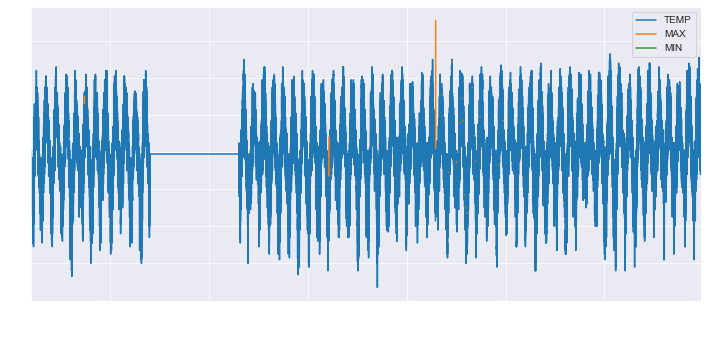

In [12]:
ax = data.plot()

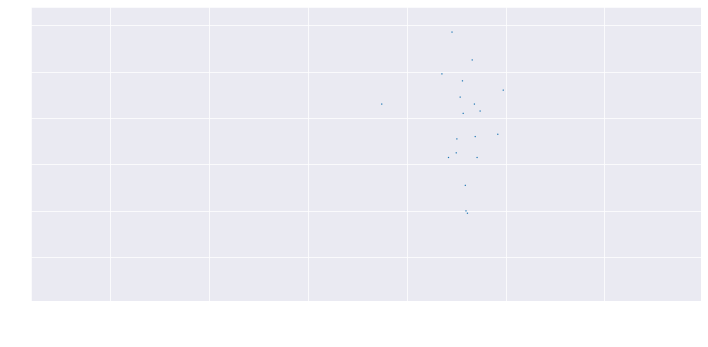

In [13]:
data["MIN"].plot()

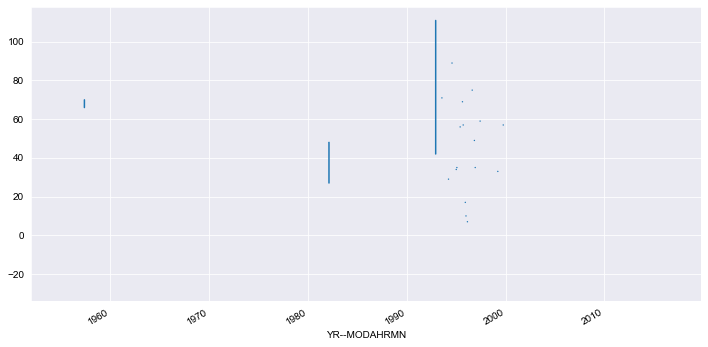

In [16]:
data["MAX"].plot()

In [17]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

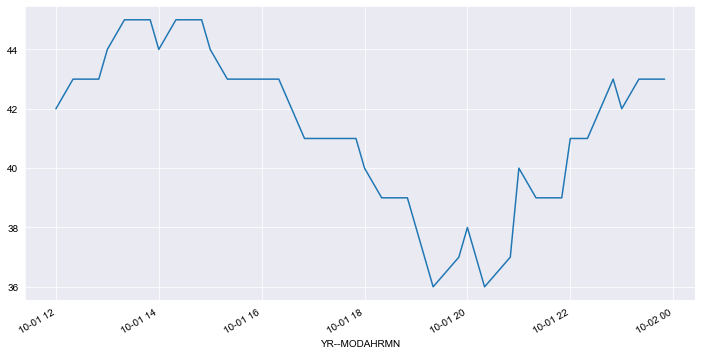

In [13]:
oct1_temps = data['TEMP'].loc[data.index >= '201910011200']
ax = oct1_temps.plot()

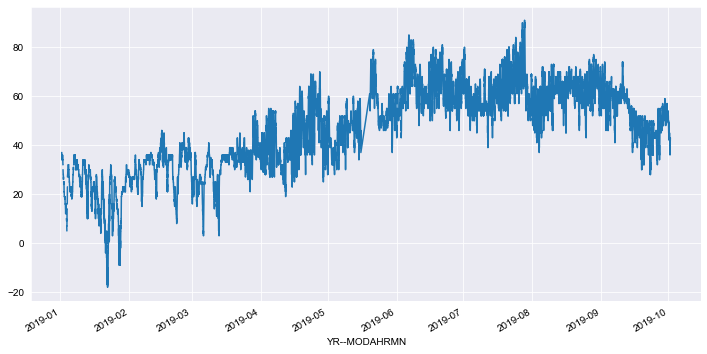

In [14]:
sample_temp = data['TEMP'].loc[data.index >= '201901011200']
ax = sample_temp.plot()

Text(0, 0.5, 'Temperature [ºF]')

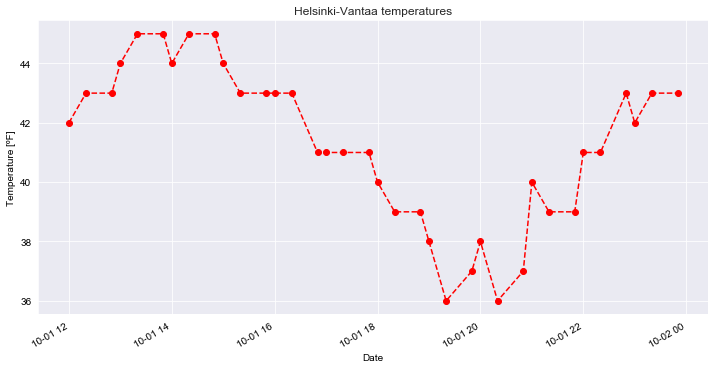

In [15]:
ax = oct1_temps.plot(style='ro--', title='Helsinki-Vantaa temperatures')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [ºF]')

In [16]:
help(oct1_temps.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pie' : pie plot
 |      - 'sc

/Users/yk/programming/python/testsecond/cv/lib/python3.6/site-packages/pandas/plotting/_core.py:1280: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim((start_edge, end_edge))


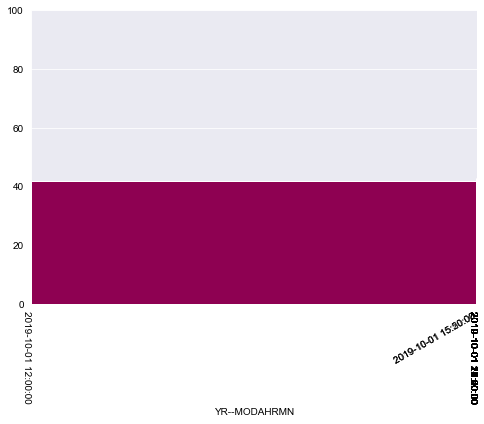

In [22]:
oct1_temps.plot(kind='line')
oct1_temps.plot(kind='bar', figsize=(8,6), use_index=True, grid=True, logx='sym', xlim=(0.100), ylim=(0,100), rot=270, colormap='PiYG')


In [17]:
# ax.text(x,y, 'Text to display')
# data.index[0]
# data["TEMP"]
ax.text(data.index[0], data["TEMP"][0], 'Text to display')

Text(1952-01-01 00:00:00, 36.0, 'Text to display')

Text(2019-10-01 12:05:00, 42.0, '<- Coldest temperature in early afternoon')

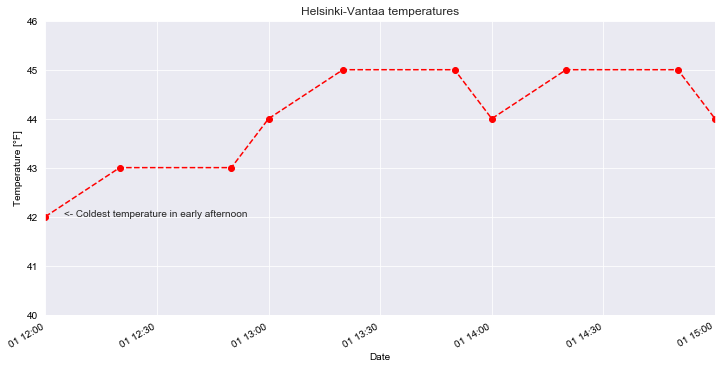

In [18]:
start_time = pd.to_datetime('201910011200')
end_time = pd.to_datetime('201910011500')
cold_time = pd.to_datetime('201910011205')

ax = oct1_temps.plot(style='ro--', title='Helsinki-Vantaa temperatures', xlim=[start_time, end_time], ylim=[40.0, 46.0])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(cold_time, 42.0, '<- Coldest temperature in early afternoon')

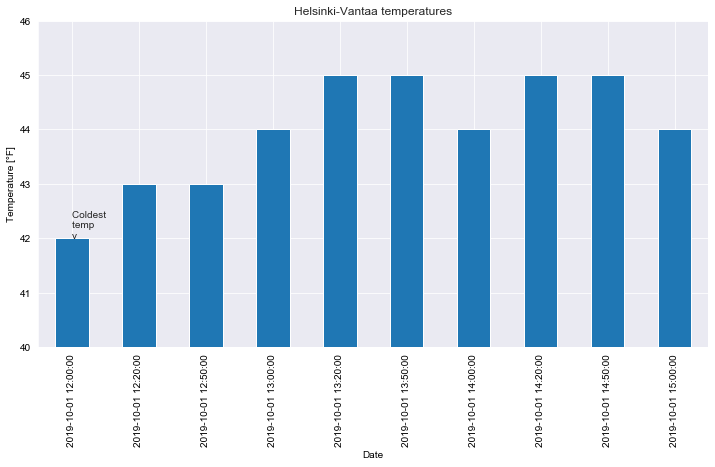

In [19]:
oct1_afternoon = oct1_temps.loc[oct1_temps.index <= '201910011500']
ax = oct1_afternoon.plot(kind='bar', title='Helsinki-Vantaa temperatures', ylim=[40, 46])
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°F]')
ax.text(0, 42.0, 'Coldest \ntemp \nv')

# save as image
plt.savefig('bar-plot.png')

In [20]:
pandas_bokeh.output_notebook()

# you need for pandas >= 0.25
# [PatrikHlobil/Pandas-Bokeh: Bokeh Plotting Backend for Pandas and GeoPandas](https://github.com/PatrikHlobil/Pandas-Bokeh)
pd.set_option('plotting.backend', 'pandas_bokeh')

Loading BokehJS ...

In [22]:
sept29_oct1_df = data.loc[data.index >= '201909290000']

start_time = pd.to_datetime('201909290000')
end_time = pd.to_datetime('201910020000')

ax = sept29_oct1_df.plot(title='Helsinki-Vantaa temperatures',
                         xlabel='Date', ylabel='Temperature [°F]',
                         xlim=[start_time, end_time], ylim=[35.0, 60.0])

In [96]:
ax = sept29_oct1_df.plot(title='Helsinki-Vantaa temperatures',
                         xlabel='Date', ylabel='Temperature [°F]',
                         xlim=[start_time, end_time], ylim=[35.0, 60.0],
                         plot_data_points=True)